<a href="https://colab.research.google.com/github/Mix1996/Prediction-of-Product-Sales/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Loading Data`

In [ ]:
## Import Pandas with the alias pd
import pandas as pd

In [ ]:
## Define the file address as a string
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRTUrknRc0jZw8b3wwq4-d8Z1vknBcfjIJycZVo3-mS02tF_bSV793wMVUz6YCkRQx6V08vGYId_ZeS/pub?output=csv"

In [ ]:
## Define a dataframe 'df'
df = pd.read_csv(file_url)

In [ ]:
##View first 5 rows of data
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Display the column names, count of non-null values, and their datatypes
## for the dataframe 'df'
## Columns with mixed datatypes are identified as an object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 1.6+ MB


# `Data Cleaning`

In [ ]:
##How many rows/columns:
df.shape


(17046, 12)

In [ ]:
##Checking the data types:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
##Checking for duplicated data:
df.duplicated().sum()

8522

In [ ]:
##There are 8522 duplicates in the dataset which we will drop.
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
##Checking for missing values:
df.isna().sum()

Item_Identifier                 1
Item_Weight                  1464
Item_Fat_Content                1
Item_Visibility                 1
Item_Type                       1
Item_MRP                        1
Outlet_Identifier               1
Outlet_Establishment_Year       1
Outlet_Size                  2411
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales               1
dtype: int64

In [ ]:
##Address the missing values by using a placeholder value.
df.fillna("MISSING", inplace=True)

In [ ]:
### Check if there are any missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values remaining.")
else:
    print("Missing values still present.")

No missing values remaining.


In [ ]:
# Define the columns to check for inconsistent categories
columns_to_check = ['Item_Fat_Content', 'Item_Type']

In [ ]:
# Iterate over the columns and fix inconsistent categories
for col in columns_to_check:
    df[col] = df[col].str.lower()

In [ ]:
# Display the updated value counts for the relevant columns
for col in columns_to_check:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Item_Fat_Content:
low fat    5201
regular    2889
lf          316
reg         117
missing       1
Name: Item_Fat_Content, dtype: int64

Value counts for Item_Type:
fruits and vegetables    1232
snack foods              1200
household                 910
frozen foods              856
dairy                     682
canned                    649
baking goods              648
health and hygiene        520
soft drinks               445
meat                      425
breads                    251
hard drinks               214
others                    169
starchy foods             148
breakfast                 110
seafood                    64
missing                     1
Name: Item_Type, dtype: int64



In [ ]:
# Update values Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('lf', 'low fat')

In [ ]:
# Update values Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('regularular', 'regular')

In [ ]:
# Update values Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'regular')

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns

In [ ]:
# Obtain summary statistics for "Item_Weight" column
item_weight_stats = df['Item_Weight'].describe()

print(item_weight_stats[['min', 'max', 'mean']])

KeyError: ignored

In [ ]:
df['Item_Weight'] = df['Item_Weight'].astype('float64')

ValueError: ignored

In [ ]:
# Replace 'MISSING' with NaN
df['Item_MRP'] = df['Item_MRP'].replace('MISSING', float('nan')).astype('float64')

df['Item_MRP'] = pd.to_numeric(df['Item_MRP'], errors='coerce')
# Replace 'MISSING' with NaN
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].replace('MISSING', float('nan')).astype('float64')
df['Item_Outlet_Sales'] = pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce')

# Replace 'MISSING' with NaN
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].replace('MISSING', float('nan')).astype('float64')
df['Item_Outlet_Sales'] = pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce')

# Replace 'MISSING' with NaN
df['Item_Visibility'] = df['Item_Visibility'].replace('MISSING', float('nan')).astype('float64')
df['Item_Visibility'] = pd.to_numeric(df['Item_Visibility'], errors='coerce')


# `Project 1 - Part 3`

# Import Libraries #

In [ ]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

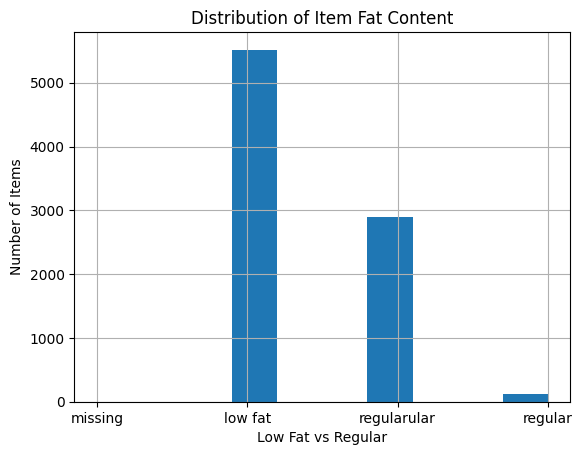

In [ ]:
#Histograms to view the distributions of numerical features in your dataset.
## Define a MatplotLib ax object using pandas' .hist()
## Default Bins = 10
ax = df['Item_Fat_Content'].hist()

## Set the Title
ax.set_title('Distribution of Item Fat Content')
## Set the X axis label
ax.set_xlabel('Low Fat vs Regular')
## Set the Y axis label
ax.set_ylabel('Number of Items');

The count of low fat items for sale is higher than regular fat items.

In [ ]:
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce')

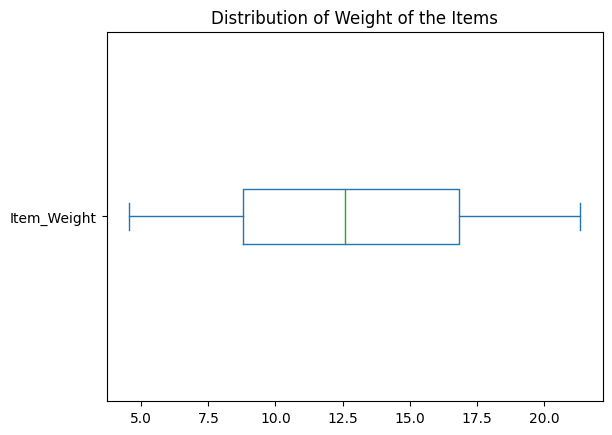

In [ ]:
#Boxplots to view statistical summaries of numerical features in your dataset.
## Define a MatplotLib ax object using pandas' .plot()
## Using kind='box'
## Using vert=False
ax = df['Item_Weight'].plot(kind='box', vert=False)

## Set the Title
ax.set_title('Distribution of Weight of the Items');

The boxplot is skewed to the right

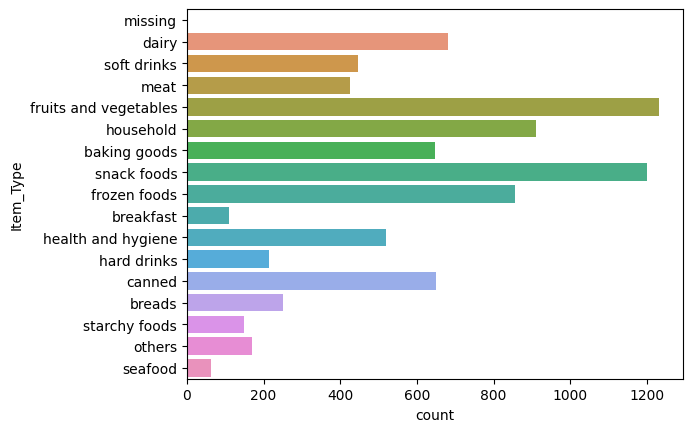

In [ ]:
#Countplots to view the frequency of each class of categorial features in your dataset.
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   y='Item_Type')

## Note Seaborn automatically sets X and Y axis labels

Fruit and Vegetables are the items with the highest count of items in inventory and seafood is the lowest.

In [ ]:
#Heatmap to view the correlation between features.
# To get the r value for specific features use series.corr()
# Here we find the correlation coefficient for Weight and Price
df['Item_Outlet_Sales'].corr(df['Item_MRP'])

0.5675744466569195

In [ ]:
# To check all numeric features in the dataframe for correlations, use df.corr()
corr = df.corr()

# tabular view of correlation values
corr

,Item_Weight,Item_MRP
Item_Weight,1.000000,0.027141
Item_MRP,0.027141,1.000000


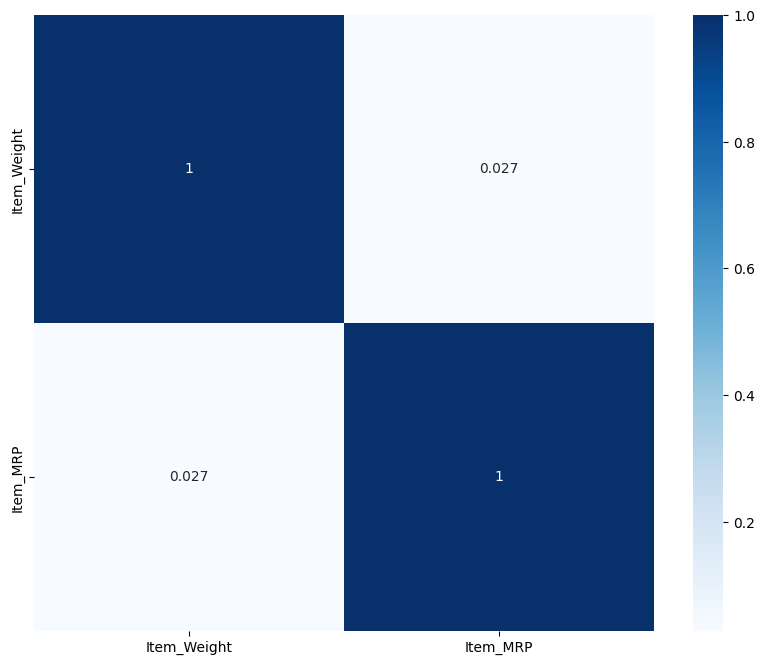

In [ ]:
## Define MatplotLib fig and ax objects using plt.subplots()
## Use figsize= to set thesize of the figure
fig, ax = plt.subplots(figsize = (10, 8))

## Define a MatplotLib ax object using sns.heatmap()
## Use cmap= to define the color map
## USe annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap= 'Blues', annot = True);

There is a strong correlation between Item Weight and the Item Outlet Sales.

# 	Project 1 - Part 4 (Core) - Feature Inspection Exercise #

In [ ]:
##Address the missing values by using a placeholder value Null.
df.fillna(np.nan, inplace=True)

In [ ]:
### Check if there are any missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values remaining.")
else:
    print("Missing values still present.")

Missing values still present.


In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{https://colab.research.google.com/drive/1CdBHwL2DUCEMaqzTFO7s0piXRBMhGjpU?usp=sharing#scrollTo=j2ko2I5u9cdA}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{https://colab.research.google.com/drive/1CdBHwL2DUCEMaqzTFO7s0piXRBMhGjpU?usp=sharing#scrollTo=j2ko2I5u9cdA}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8524 entries, 0 to 17045
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        7060 non-null   float64
 1   Item_Fat_Content   8524 non-null   object 
 2   Item_Type          8524 non-null   object 
 3   Item_MRP           8523 non-null   float64
 4   Outlet_Size        8524 non-null   object 
 5   Outlet_Type        8524 non-null   object 
 6   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(3), object(4)
memory usage: 532.8+ KB


,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,NaN,missing,missing,NaN,MISSING,MISSING,NaN
1,9.30,low fat,dairy,249.8092,Medium,Supermarket Type1,3735.1380
3,5.92,regularular,soft drinks,48.2692,Medium,Supermarket Type2,443.4228
5,17.50,low fat,meat,141.6180,Medium,Supermarket Type1,2097.2700
7,19.20,regularular,fruits and vegetables,182.0950,MISSING,Grocery Store,732.3800


**Define your target column:**
Item_Outlet_Sales

**Inspecting Features**

In [ ]:
# Keep ony required columns
use_cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Type','Item_Outlet_Sales']
df = df[use_cols]
df

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,NaN,missing,missing,NaN,MISSING,MISSING,NaN
1,9.300,low fat,dairy,249.8092,Medium,Supermarket Type1,3735.1380
3,5.920,regularular,soft drinks,48.2692,Medium,Supermarket Type2,443.4228
5,17.500,low fat,meat,141.6180,Medium,Supermarket Type1,2097.2700
7,19.200,regularular,fruits and vegetables,182.0950,MISSING,Grocery Store,732.3800
...,...,...,...,...,...,...,...
17037,6.865,low fat,snack foods,214.5218,High,Supermarket Type1,2778.3834
17039,8.380,regularular,baking goods,108.1570,MISSING,Supermarket Type1,549.2850
17041,10.600,low fat,health and hygiene,85.1224,Small,Supermarket Type1,1193.1136
17043,7.210,regularular,snack foods,103.1332,Medium,Supermarket Type2,1845.5976


### Item Weight

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

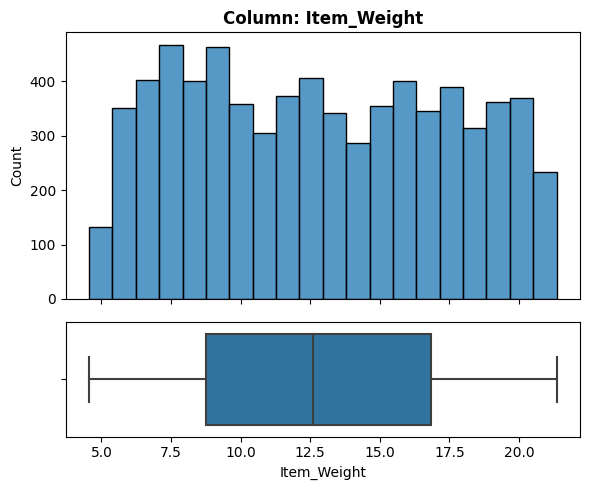

- NaN's Found: 1464 (17.18%)
- Unique Values: 415
- Most common value: 'nan' occurs 1464 times (17.18%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1464 (17.18%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


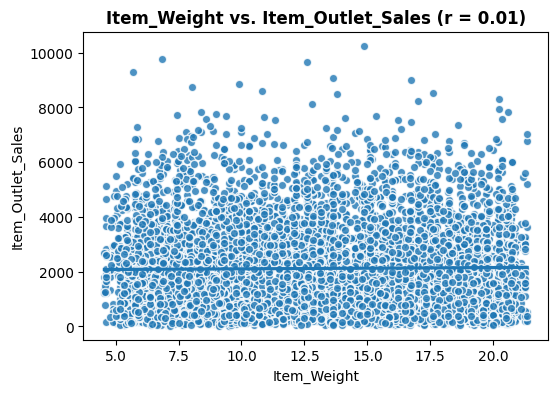

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - NO, the outlet sales can't be predicated with the item weight.

### Item_Fat_Content

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

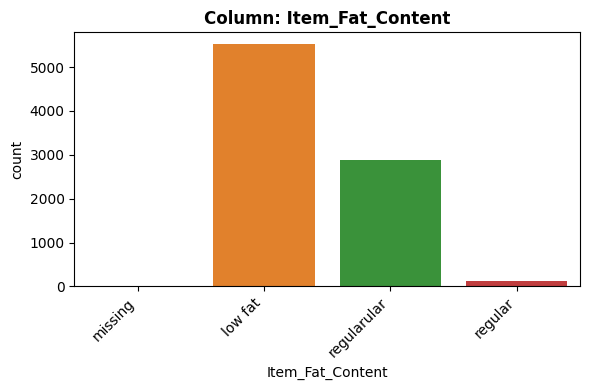

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'low fat' occurs 5517 times (64.72%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique values (low)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

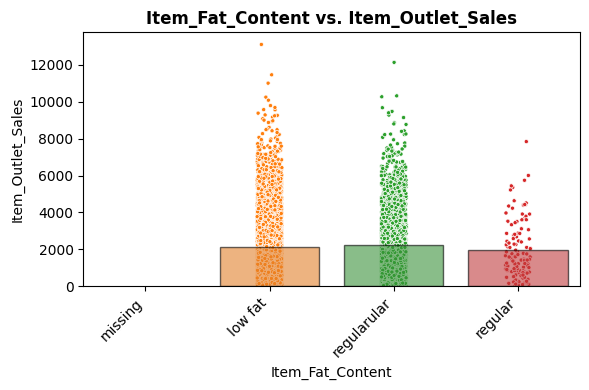

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, outlet sales increase depening on the Item_Fat_Content.
  - Does this feature appear to be a predictor of the target?
    - Yes, outlet sales increase depening on the Item_Fat_Content.

### Item_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

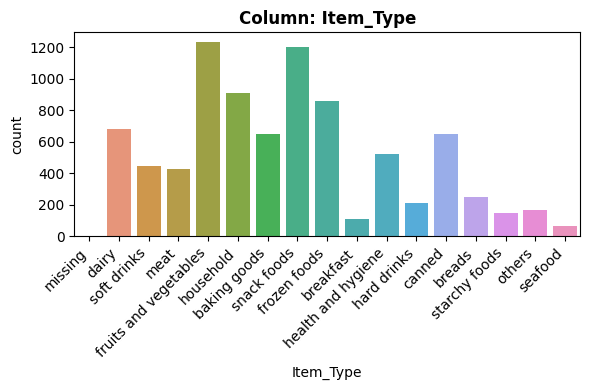

- NaN's Found: 0 (0.0%)
- Unique Values: 17
- Most common value: 'fruits and vegetables' occurs 1232 times (14.45%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 17 unique values (low)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

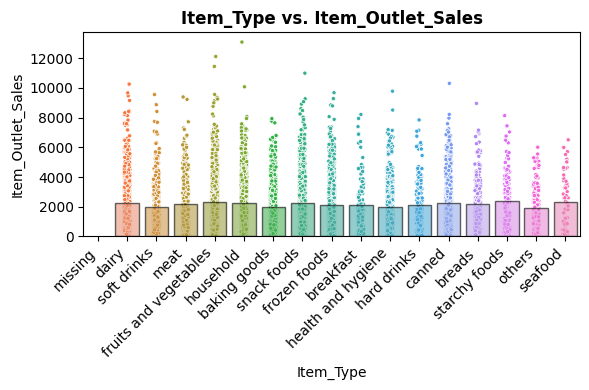

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, outlet sales increase depening on the Item Type.
  - Does this feature appear to be a predictor of the target?
    - Yes, outlet sales can be predicted using the item type.

### Item MRP

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

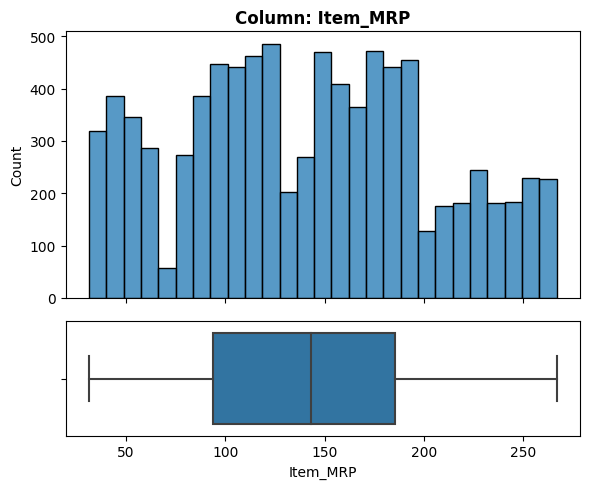

- NaN's Found: 1 (0.01%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1 (0.01%)
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 5938 unique values (high)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

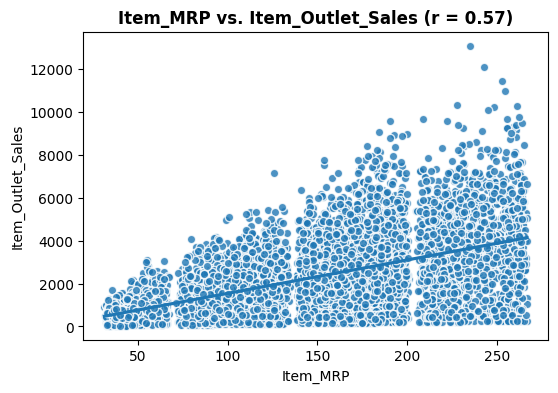

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, outlet sales increase depening on the Item MRP.
  - Does this feature appear to be a predictor of the target?
    - Yes, outlet sales can be predicted using the Item MRP.

### Outlet_Size

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

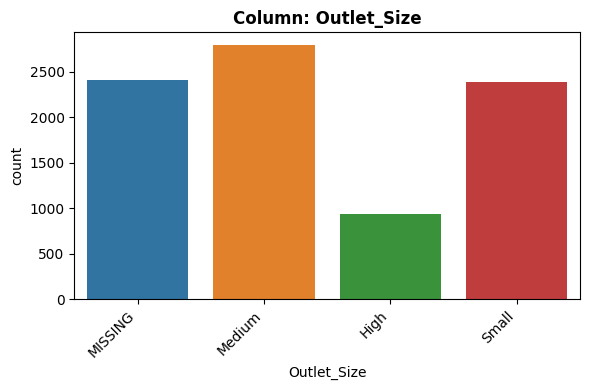

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique values (low)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

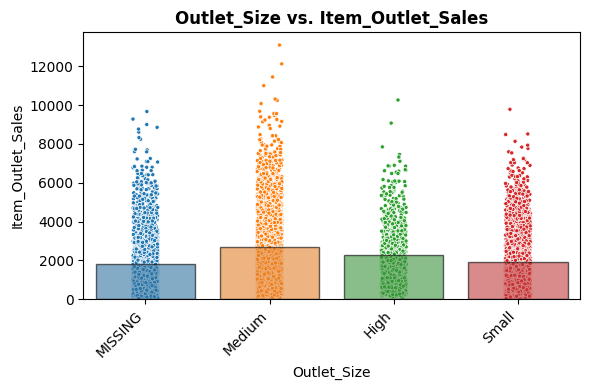

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, outlet sales can be predicted using the outlet size.
  - Does this feature appear to be a predictor of the target?
    - Yes, outlet sales can be predicted using the outlet size.

### Outlet_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

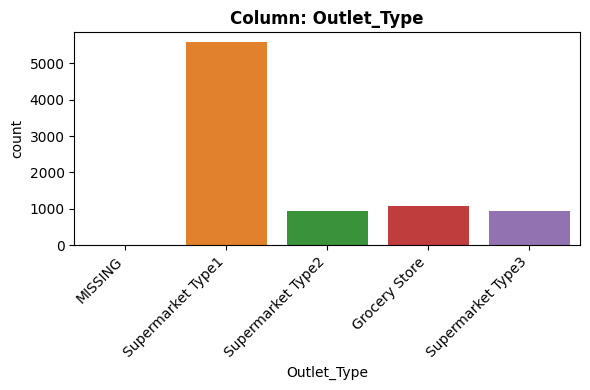

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 5 unique values (low)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

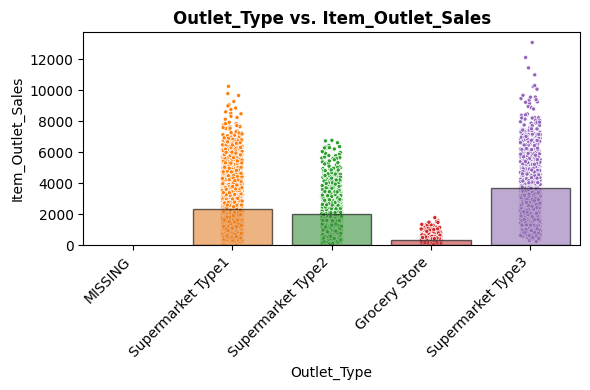

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, outlet sales can be predicted using the outlet type.
  - Does this feature appear to be a predictor of the target?
    - Yes, outlet sales can be predicted using the outlet size.

### Item_Outlet_Sales (target)

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

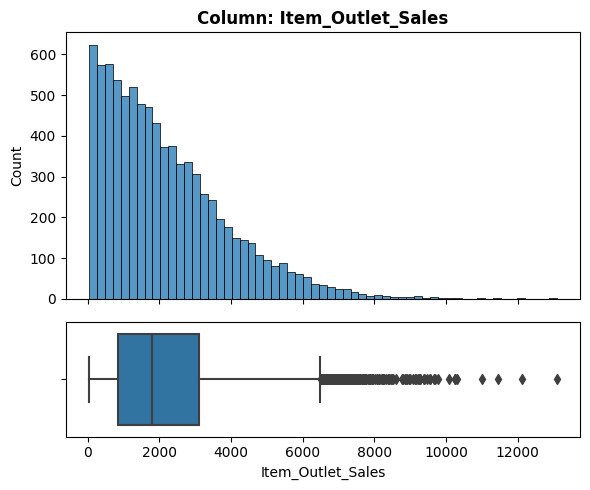

- NaN's Found: 1 (0.01%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1 (0.01%)
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, this is our target

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, this is our target

# Project 1 - Part 5

In [40]:
# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

#from sklearn import set_config
#set_config(display='diagram')





In [6]:
# Load data
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRTUrknRc0jZw8b3wwq4-d8Z1vknBcfjIJycZVo3-mS02tF_bSV793wMVUz6YCkRQx6V08vGYId_ZeS/pub?output=csv')

In [7]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data

In [8]:
# Checking for Duplicates
df2.duplicated().sum()

8522

In [9]:
# Dropping Duplicates
df2.drop_duplicates(inplace = True)

In [10]:
# Checking again for Duplicates
df2.duplicated().sum()

0

In [11]:
# Checking missing values
df2.isna().sum()

Item_Identifier                 1
Item_Weight                  1464
Item_Fat_Content                1
Item_Visibility                 1
Item_Type                       1
Item_MRP                        1
Outlet_Identifier               1
Outlet_Establishment_Year       1
Outlet_Size                  2411
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales               1
dtype: int64

In [12]:
##Address the missing values by using a placeholder value.
df2.fillna("MISSING", inplace=True)

In [13]:
### Check if there are any missing values
missing_values = df2.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values remaining.")
else:
    print("Missing values still present.")

No missing values remaining.


In [14]:
# Define the columns to check for inconsistent categories
columns_to_check = ['Item_Fat_Content', 'Item_Type']

In [16]:
# Iterate over the columns and fix inconsistent categories
for col in columns_to_check:
    df2[col] = df2[col].str.lower()

In [17]:
# Display the updated value counts for the relevant columns
for col in columns_to_check:
    print(f"Value counts for {col}:")
    print(df2[col].value_counts())
    print()

Value counts for Item_Fat_Content:
low fat    5201
regular    2889
lf          316
reg         117
missing       1
Name: Item_Fat_Content, dtype: int64

Value counts for Item_Type:
fruits and vegetables    1232
snack foods              1200
household                 910
frozen foods              856
dairy                     682
canned                    649
baking goods              648
health and hygiene        520
soft drinks               445
meat                      425
breads                    251
hard drinks               214
others                    169
starchy foods             148
breakfast                 110
seafood                    64
missing                     1
Name: Item_Type, dtype: int64



In [23]:
# Update values Low Fat
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].str.replace('lf', 'low fat')

In [24]:
# Update values Regular
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].str.replace('regularular', 'regular')

In [25]:
# Update values Regular
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].str.replace('reg', 'regular')

In [26]:
# Select numerical columns
numerical_cols = df2.select_dtypes(include='number').columns

In [27]:
# Obtain summary statistics for "Item_Weight" column
item_weight_stats = df['Item_Weight'].describe()

print(item_weight_stats[['min', 'max', 'mean']])

min      4.555000
max     21.350000
mean    12.857645
Name: Item_Weight, dtype: float64


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8524 entries, 0 to 17045
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8524 non-null   object
 1   Item_Weight                8524 non-null   object
 2   Item_Fat_Content           8524 non-null   object
 3   Item_Visibility            8524 non-null   object
 4   Item_Type                  8524 non-null   object
 5   Item_MRP                   8524 non-null   object
 6   Outlet_Identifier          8524 non-null   object
 7   Outlet_Establishment_Year  8524 non-null   object
 8   Outlet_Size                8524 non-null   object
 9   Outlet_Location_Type       8524 non-null   object
 10  Outlet_Type                8524 non-null   object
 11  Item_Outlet_Sales          8524 non-null   object
dtypes: object(12)
memory usage: 865.7+ KB


In [34]:
# Replace 'MISSING' with NaN
df2['Item_MRP'] = df2['Item_MRP'].replace('MISSING', float('nan')).astype('float64')

df2['Item_MRP'] = pd.to_numeric(df2['Item_MRP'], errors='coerce')
# Replace 'MISSING' with NaN
df2['Item_Outlet_Sales'] = df2['Item_Outlet_Sales'].replace('MISSING', float('nan')).astype('float64')
df2['Item_Outlet_Sales'] = pd.to_numeric(df2['Item_Outlet_Sales'], errors='coerce')

# Replace 'MISSING' with NaN
df2['Item_Outlet_Sales'] = df2['Item_Outlet_Sales'].replace('MISSING', float('nan')).astype('float64')
df2['Item_Outlet_Sales'] = pd.to_numeric(df2['Item_Outlet_Sales'], errors='coerce')

# Replace 'MISSING' with NaN
df2['Item_Visibility'] = df2['Item_Visibility'].replace('MISSING', float('nan')).astype('float64')
df2['Item_Visibility'] = pd.to_numeric(df2['Item_Visibility'], errors='coerce')


df2['Item_Weight'] = pd.to_numeric(df2['Item_Weight'], errors='coerce')

In [36]:
# Display the updated DataFrame
print(df2.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [37]:
# Separate data into X (input features) and y (target variable)
X = df2.drop(columns=['Item_Outlet_Sales'])  # Exclude 'Item_Outlet_Sales' column
y = df2['Item_Outlet_Sales']

Train-Test-Split

In [38]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Making a Preprocessing Pipeline

In [41]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [45]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [46]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [47]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [48]:
## test num_pipe (optional)
scaler.fit_transform(X_train[num_selector(X_train)])

array([[        nan, -0.79632332, -1.70314063],
       [ 1.02144228,  0.78577812,  0.40004249],
       [-1.28845613, -0.57267052,  1.65908196],
       ...,
       [-0.33415716,  0.03101506,  1.91659023],
       [ 0.17150295, -0.31248378,  0.15642731],
       [-0.15125882, -1.27619961, -0.27252847]])

In [49]:
## Combine into 1 column transformer
preprocessor = make_column_transformer((cat_pipe,cat_selector),
                                       (scaler,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b073186ce80>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b073186d3c0>)])

In [50]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ...,         nan,
        -0.79632332, -1.70314063],
       [ 0.        ,  0.        ,  0.        , ...,  1.02144228,
         0.78577812,  0.40004249],
       [ 0.        ,  0.        ,  0.        , ..., -1.28845613,
        -0.57267052,  1.65908196],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.33415716,
         0.03101506,  1.91659023],
       [ 0.        ,  0.        ,  0.        , ...,  0.17150295,
        -0.31248378,  0.15642731],
       [ 0.        ,  0.        ,  0.        , ..., -0.15125882,
        -1.27619961, -0.27252847]])

In [51]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer